In [1]:
#importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re
import math 


In [2]:
#cargo el dataset
df=pd.read_csv("AccidentesAviones.csv") 

In [3]:
#miro como quedo cargado 
df.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [4]:
#veo las dimensiones
df.shape

(5008, 18)

In [5]:
#veo el numero de las colunmas 
df.columns

Index(['Unnamed: 0', 'fecha', 'HORA declarada', 'Ruta', 'OperadOR',
       'flight_no', 'route', 'ac_type', 'registration', 'cn_ln', 'all_aboard',
       'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos',
       'passenger_fatalities', 'crew_fatalities', 'ground', 'summary'],
      dtype='object')

In [6]:
#veo que tipo de dato tiene cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5008 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

In [7]:
#veo que tiene la columna Unnamed: 0
df["Unnamed: 0"].min()

0

In [8]:
df["Unnamed: 0"].max()

5007

In [9]:
#elimino la columna Unnamed 
df_2=df.drop(["Unnamed: 0"],axis=1)

In [10]:
#veo si la elimino 
df_2.head()

,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [11]:
#cambio todo a minuscula y elimino posibles espacios antes y despues de la oracion  
df_2 = df_2.applymap(lambda x: x.strip().lower())


In [12]:
#veo como quedo la transformacion 
df_2.head()

,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,"september 17, 1908",1718,"fort myer, virginia",military - u.s. army,?,demonstration,wright flyer iii,?,1,2,1,1,1,1,0,0,"during a demonstration flight, a u.s. army fly..."
1,"september 07, 1909",?,"juvisy-sur-orge, france",?,?,air show,wright byplane,sc1,?,1,0,1,1,0,0,0,eugene lefebvre was the first pilot to ever be...
2,"july 12, 1912",0630,"atlantic city, new jersey",military - u.s. navy,?,test flight,dirigible,?,?,5,0,5,5,0,5,0,first u.s. dirigible akron exploded just offsh...
3,"august 06, 1913",?,"victoria, british columbia, canada",private,?,?,curtiss seaplane,?,?,1,0,1,1,0,1,0,the first fatal airplane accident in canada oc...
4,"september 09, 1913",1830,over the north sea,military - german navy,?,?,zeppelin l-1 (airship),?,?,20,?,?,14,?,?,0,the airship flew into a thunderstorm and encou...


In [13]:
#reemplazo ? x nulos  
df_2 = df_2.replace("?", np.nan)

In [14]:
#vamos a cambiar el nombre de las columnas 
df_3 = df_2.rename(columns=lambda x: x.strip().lower())

In [15]:
df_3 = df_3.rename(columns=lambda x: x.lower().replace(" ","_"))

In [16]:
df_3.head()

,fecha,hora_declarada,ruta,operador,flight_no,route,ac_type,registration,cn_ln,all_aboard,pasajeros_a_bordo,crew_aboard,cantidad_de_fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,"september 17, 1908",1718,"fort myer, virginia",military - u.s. army,NaN,demonstration,wright flyer iii,NaN,1,2,1,1,1,1,0,0,"during a demonstration flight, a u.s. army fly..."
1,"september 07, 1909",NaN,"juvisy-sur-orge, france",NaN,NaN,air show,wright byplane,sc1,NaN,1,0,1,1,0,0,0,eugene lefebvre was the first pilot to ever be...
2,"july 12, 1912",0630,"atlantic city, new jersey",military - u.s. navy,NaN,test flight,dirigible,NaN,NaN,5,0,5,5,0,5,0,first u.s. dirigible akron exploded just offsh...
3,"august 06, 1913",NaN,"victoria, british columbia, canada",private,NaN,NaN,curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,the first fatal airplane accident in canada oc...
4,"september 09, 1913",1830,over the north sea,military - german navy,NaN,NaN,zeppelin l-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,the airship flew into a thunderstorm and encou...


In [17]:
#combierto la columna en formato fecha 
df_3['fecha'] = pd.to_datetime(df_3['fecha'], format='%B %d, %Y')


In [18]:
df_3.head()

,fecha,hora_declarada,ruta,operador,flight_no,route,ac_type,registration,cn_ln,all_aboard,pasajeros_a_bordo,crew_aboard,cantidad_de_fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,1908-09-17,1718,"fort myer, virginia",military - u.s. army,NaN,demonstration,wright flyer iii,NaN,1,2,1,1,1,1,0,0,"during a demonstration flight, a u.s. army fly..."
1,1909-09-07,NaN,"juvisy-sur-orge, france",NaN,NaN,air show,wright byplane,sc1,NaN,1,0,1,1,0,0,0,eugene lefebvre was the first pilot to ever be...
2,1912-07-12,0630,"atlantic city, new jersey",military - u.s. navy,NaN,test flight,dirigible,NaN,NaN,5,0,5,5,0,5,0,first u.s. dirigible akron exploded just offsh...
3,1913-08-06,NaN,"victoria, british columbia, canada",private,NaN,NaN,curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,the first fatal airplane accident in canada oc...
4,1913-09-09,1830,over the north sea,military - german navy,NaN,NaN,zeppelin l-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,the airship flew into a thunderstorm and encou...


In [19]:
# veo la cantidad de nulos en la columna hora declarada
df_3["hora_declarada"].isnull().sum()


1504

In [20]:
# veo los errores al querer pasar a formato hora 
for value in df_3['hora_declarada']:
    try:
        pd.to_datetime(value, format='%H%M')
    except ValueError:
        if value!="?":
            print("Valor inválido:", value)

Valor inválido: c 18:00
Valor inválido: c 02:30
Valor inválido: c 12:00
Valor inválido: c 13:15
Valor inválido: 10:00
Valor inválido: 14:48
Valor inválido: c 11:00
Valor inválido: c 9:15
Valor inválido: 11:30
Valor inválido: c 10:00
Valor inválido: 08:00
Valor inválido: 10:45
Valor inválido: 09:18
Valor inválido: c 17:00
Valor inválido: 18:23
Valor inválido: 17:30
Valor inválido: c:17:00
Valor inválido: 15:00
Valor inválido: c 15:45
Valor inválido: 02:05
Valor inválido: 09:45
Valor inválido: c: 2:00
Valor inválido: c 16:00
Valor inválido: 02:00
Valor inválido: c 08:00
Valor inválido: c:09:00
Valor inválido: 02:07
Valor inválido: 14:30
Valor inválido: 15:00
Valor inválido: c 13:00
Valor inválido: c 20:40
Valor inválido: 21:30
Valor inválido: c 23:00
Valor inválido: 10:50
Valor inválido: c 09:00
Valor inválido: c 10:00
Valor inválido: c 20:35
Valor inválido: c 20:40
Valor inválido: 17:15
Valor inválido: c 15:00
Valor inválido: 03:59
Valor inválido: 18:25
Valor inválido: 11:03
Valor invál

In [21]:
df_4=df_3.copy()

In [22]:
# Función para convertir los diferentes formatos a hora
def convertir_a_hora(tiempo_str):
    if pd.isnull(tiempo_str):
        return tiempo_str
    pattern = r'^(\d{1,2})(?::)?(\d{2})?'
    matches = re.findall(pattern, tiempo_str)
    if matches:
        hora, minutos = matches[0]
        tiempo_formateado = f'{hora.zfill(2)}:{minutos.zfill(2)}'
        return tiempo_formateado
    else:
        return tiempo_str


In [23]:
# Aplicar la función a la columna "Tiempo"
df_4['hora_declarada'] = df_4['hora_declarada'].apply(convertir_a_hora)

In [24]:
df_4.isnull().sum()

fecha                        0
hora_declarada            1504
ruta                         5
operador                    10
flight_no                 3682
route                      762
ac_type                     13
registration               272
cn_ln                      667
all_aboard                  17
pasajeros_a_bordo          221
crew_aboard                219
cantidad_de_fallecidos       8
passenger_fatalities       235
crew_fatalities            235
ground                      44
summary                     59
dtype: int64

In [25]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   5008 non-null   datetime64[ns]
 1   hora_declarada          3504 non-null   object        
 2   ruta                    5003 non-null   object        
 3   operador                4998 non-null   object        
 4   flight_no               1326 non-null   object        
 5   route                   4246 non-null   object        
 6   ac_type                 4995 non-null   object        
 7   registration            4736 non-null   object        
 8   cn_ln                   4341 non-null   object        
 9   all_aboard              4991 non-null   object        
 10  pasajeros_a_bordo       4787 non-null   object        
 11  crew_aboard             4789 non-null   object        
 12  cantidad_de_fallecidos  5000 non-null   object  

In [26]:
# Especificar las columnas que deseas convertir
columnas_a_convertir = ['all_aboard', 'pasajeros_a_bordo', 'crew_aboard','cantidad_de_fallecidos','passenger_fatalities','crew_fatalities', 'ground']
# Convertir las columnas a tipo numérico
df_4[columnas_a_convertir] = df_4[columnas_a_convertir].apply(pd.to_numeric)

In [27]:
# voy a seleccionar solo algunas columnas para el analisis. Las siguiente se elimina
# hora_declarada porque tiene 1504 nulos 
# flight no porque es el numero de vuelos asignador por el operador 
# registration porque es el numero de refistro unico de la aeronave
# passenger_fatalities,crew_fatalities porque considero que es importante saber si alguien murio ya sea pasajero o tripulante
seleccion_columnas=['fecha','ruta','operador','route','ac_type','cn_ln','all_aboard','pasajeros_a_bordo','cantidad_de_fallecidos','passenger_fatalities','ground']

In [28]:
df_5=df_4[seleccion_columnas] 

In [29]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   5008 non-null   datetime64[ns]
 1   ruta                    5003 non-null   object        
 2   operador                4998 non-null   object        
 3   route                   4246 non-null   object        
 4   ac_type                 4995 non-null   object        
 5   cn_ln                   4341 non-null   object        
 6   all_aboard              4991 non-null   float64       
 7   pasajeros_a_bordo       4787 non-null   float64       
 8   cantidad_de_fallecidos  5000 non-null   float64       
 9   passenger_fatalities    4773 non-null   float64       
 10  ground                  4964 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 430.5+ KB


In [30]:
null_values = df_4[["all_aboard", "pasajeros_a_bordo","crew_aboard","cantidad_de_fallecidos","passenger_fatalities","crew_fatalities","ground"]].isnull()
rows_with_nulls = null_values.any(axis=1)
rows_with_null_values = df_4[rows_with_nulls]

In [31]:
rows_with_null_values

,fecha,hora_declarada,ruta,operador,flight_no,route,ac_type,registration,cn_ln,all_aboard,pasajeros_a_bordo,crew_aboard,cantidad_de_fallecidos,passenger_fatalities,crew_fatalities,ground,summary
4,1913-09-09,18:30,over the north sea,military - german navy,NaN,NaN,zeppelin l-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,the airship flew into a thunderstorm and encou...
5,1913-10-17,10:30,"near johannisthal, germany",military - german navy,NaN,NaN,zeppelin l-2 (airship),NaN,NaN,28.0,NaN,NaN,28.0,NaN,NaN,0.0,hydrogen gas which was being vented was sucked...
7,1915-09-03,15:20,"off cuxhaven, germany",military - german navy,NaN,NaN,zeppelin l-10 (airship),NaN,NaN,19.0,NaN,NaN,19.0,NaN,NaN,0.0,"exploded and burned near neuwerk island, when..."
8,1916-07-28,NaN,"near jambol, bulgeria",military - german army,NaN,NaN,schutte-lanz s-l-10 (airship),NaN,NaN,20.0,NaN,NaN,20.0,NaN,NaN,0.0,"crashed near the black sea, cause unknown."
9,1916-09-24,01:00,"billericay, england",military - german navy,NaN,NaN,zeppelin l-32 (airship),NaN,NaN,22.0,NaN,NaN,22.0,NaN,NaN,0.0,shot down by british aircraft crashing in flames.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4894,2014-07-07,07:50,"thach that district, vietnam",military - vietnam people's army air force,NaN,training,mil mi-171,NaN,NaN,19.0,21.0,2.0,18.0,NaN,NaN,0.0,the helicopter crashed about 40 km west of ha...
4924,2016-02-02,NaN,"near mogadishu, somalia",daallo airlines,3159,mogadishu - djibouti,airbus a321-111,sx-bhs,642,72.0,72.0,NaN,1.0,1.0,NaN,0.0,shortly after leaving mogadishu airport a loud...
4936,2016-07-30,07:42,"near lockhart, texas",heart of texas hot air balloon rides,NaN,sightseeing fentress airpark,kubicek bb85z hot air balloon,n2469l,NaN,16.0,15.0,1.0,16.0,15.0,1.0,NaN,the hot air balloon struck power lines and cra...
4993,2020-01-02,NaN,"geneina, sudan",sudanese air force,NaN,geneina - khartoum,antonov an12-a,NaN,2340606,18.0,9.0,9.0,18.0,9.0,9.0,NaN,the aircraft crashed shortly after taking off ...


In [32]:
rows_with_null_values.to_csv('nulos_dataset_flight_accidents.csv', index=False)

In [33]:
#elimino las filas con nulos en la columnas numericas
#df_6=df_5.dropna(subset=["all_aboard", "pasajeros_a_bordo","cantidad_de_fallecidos","passenger_fatalities","ground"])

In [34]:
#revisando los posibles eliminados si all_aboard no esta completo "pasajeros_a_bordo","cantidad_de_fallecidos" tampoco, lo mismo pasa para las fatalidades. Entonces elimino las filas con nulos en la cantidad total
df_6=df_5.dropna(subset=["all_aboard","cantidad_de_fallecidos"])

In [35]:
#elimino unas columnas que no voy a usar
df_6=df_6.drop(["pasajeros_a_bordo", 'passenger_fatalities'], axis=1)

In [36]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4991 entries, 0 to 5007
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   4991 non-null   datetime64[ns]
 1   ruta                    4986 non-null   object        
 2   operador                4981 non-null   object        
 3   route                   4243 non-null   object        
 4   ac_type                 4980 non-null   object        
 5   cn_ln                   4339 non-null   object        
 6   all_aboard              4991 non-null   float64       
 7   cantidad_de_fallecidos  4991 non-null   float64       
 8   ground                  4959 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 389.9+ KB


In [37]:
#cambio los nulos de las columnas tipo string a sin dato
columns_to_fill = ["ruta", "route", "operador","ac_type", "cn_ln"]
replacement_value = "sin_dato"

df_7 = df_6.fillna({col: replacement_value for col in columns_to_fill})

In [38]:
#relleno con 0 los valores faltantes en ground
df_7['ground'].fillna(0, inplace=True)

In [39]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4991 entries, 0 to 5007
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   4991 non-null   datetime64[ns]
 1   ruta                    4991 non-null   object        
 2   operador                4991 non-null   object        
 3   route                   4991 non-null   object        
 4   ac_type                 4991 non-null   object        
 5   cn_ln                   4991 non-null   object        
 6   all_aboard              4991 non-null   float64       
 7   cantidad_de_fallecidos  4991 non-null   float64       
 8   ground                  4991 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 389.9+ KB


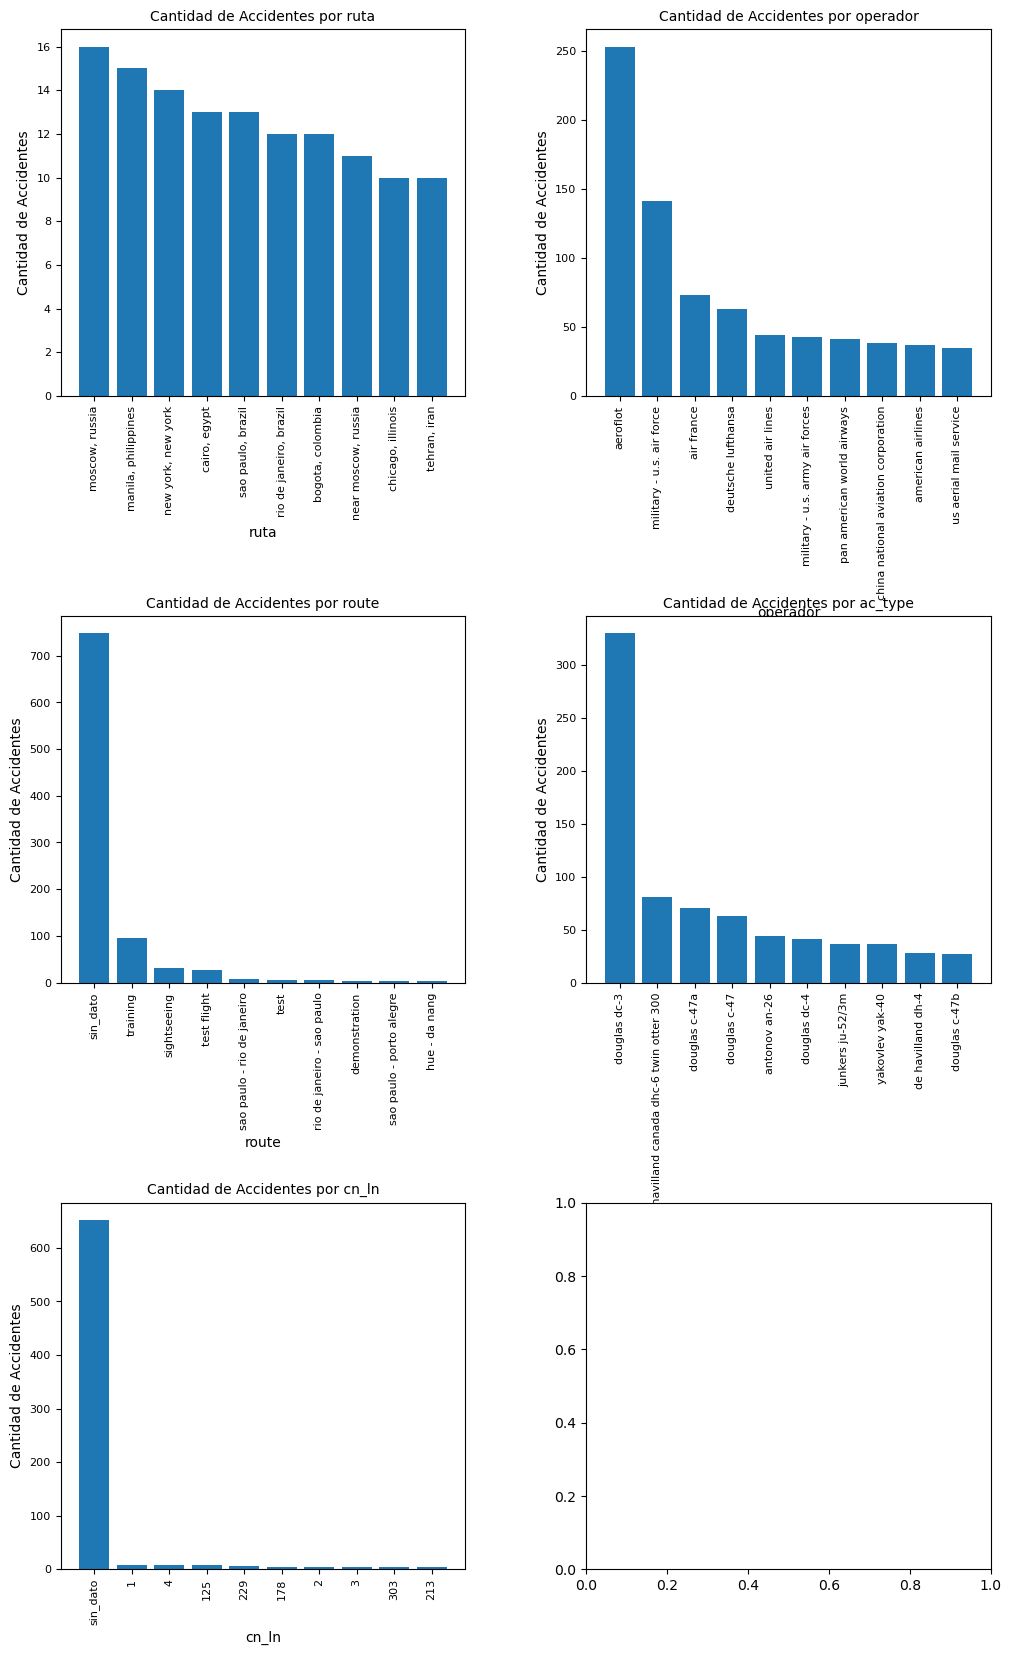

In [40]:
# Seleccionar las columnas para generar el histograma
columnas_histograma = ['ruta', 'operador', 'route', 'ac_type', 'cn_ln']
# Definir las dimensiones de la cuadrícula de subplots
num_columnas = 2
num_filas = math.ceil(len(columnas_histograma)/num_columnas)
# Crear la cuadrícula de subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(12,20))
# Obtener un arreglo plano de subplots
axs = axs.flatten()
# Iterar sobre las columnas y generar los histogramas en los subplots correspondientes
for i, columna in enumerate(columnas_histograma):
    accidentes_frecuentes = df_7[columna].value_counts().sort_values(ascending=False).head(10)
    df_filtrado = df_7[df_7[columna].isin(accidentes_frecuentes.index)]
    frecuencia_accidentes = df_filtrado[columna].value_counts()
    # Generar el histograma en el subplot correspondiente
    ax = axs[i]
    ax.bar(frecuencia_accidentes.index, frecuencia_accidentes.values)
    ax.set_title('Cantidad de Accidentes por {}'.format(columna), fontsize=10)
    ax.set_xlabel(columna)
    ax.set_ylabel('Cantidad de Accidentes')
    ax.tick_params(axis='x', rotation=90, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
# Ajustar los espacios entre los subplots
plt.subplots_adjust(hspace=0.6, wspace=0.3)
# Mostrar los subplots
plt.show()

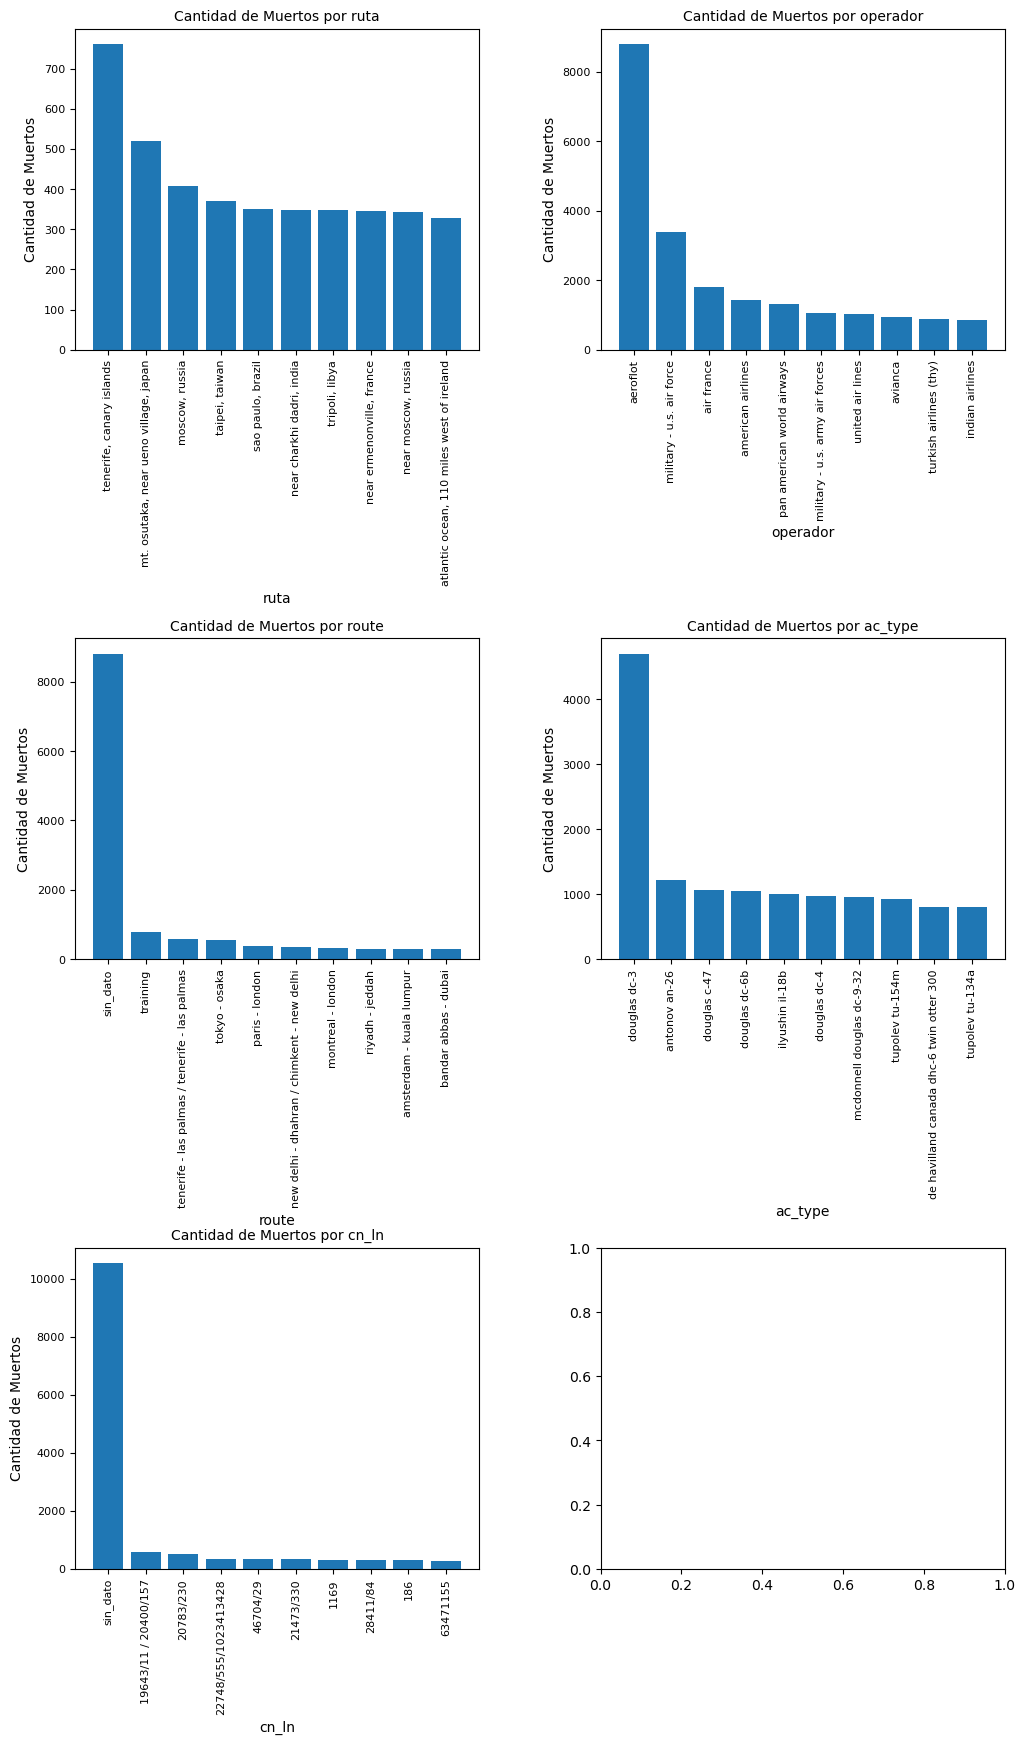

In [41]:
# Seleccionar la columna para generar el histograma
columna_histograma = 'cantidad_de_fallecidos'
# Definir las dimensiones de la cuadrícula de subplots
num_columnas = 2
num_filas = math.ceil(len(columnas_histograma)/num_columnas)
# Crear la cuadrícula de subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(12, 20))
# Obtener un arreglo plano de subplots
axs = axs.flatten()
# Iterar sobre las columnas seleccionadas y generar los histogramas en los subplots correspondientes
for i, columna in enumerate(columnas_histograma):
    muertos_frecuentes = df_7.groupby(columna)[columna_histograma].sum()
    muertos_frecuentes=muertos_frecuentes.sort_values(ascending=False).nlargest(10)
    df_filtrado = df_7[df_7[columna].isin(muertos_frecuentes.index)]
    frecuencia_accidentes = df_filtrado.groupby(columna)[columna_histograma].sum().sort_values(ascending=False)
    # Generar el histograma en el subplot correspondiente
    ax = axs[i]
    ax.bar(frecuencia_accidentes.index, frecuencia_accidentes.values)
    ax.set_title('Cantidad de Muertos por {}'.format(columna), fontsize=10)
    ax.set_xlabel(columna)
    ax.set_ylabel('Cantidad de Muertos')
    ax.tick_params(axis='x', rotation=90, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
# Ajustar los espacios entre los subplots
plt.subplots_adjust(hspace=0.9, wspace=0.3)
# Mostrar los subplots
plt.show()

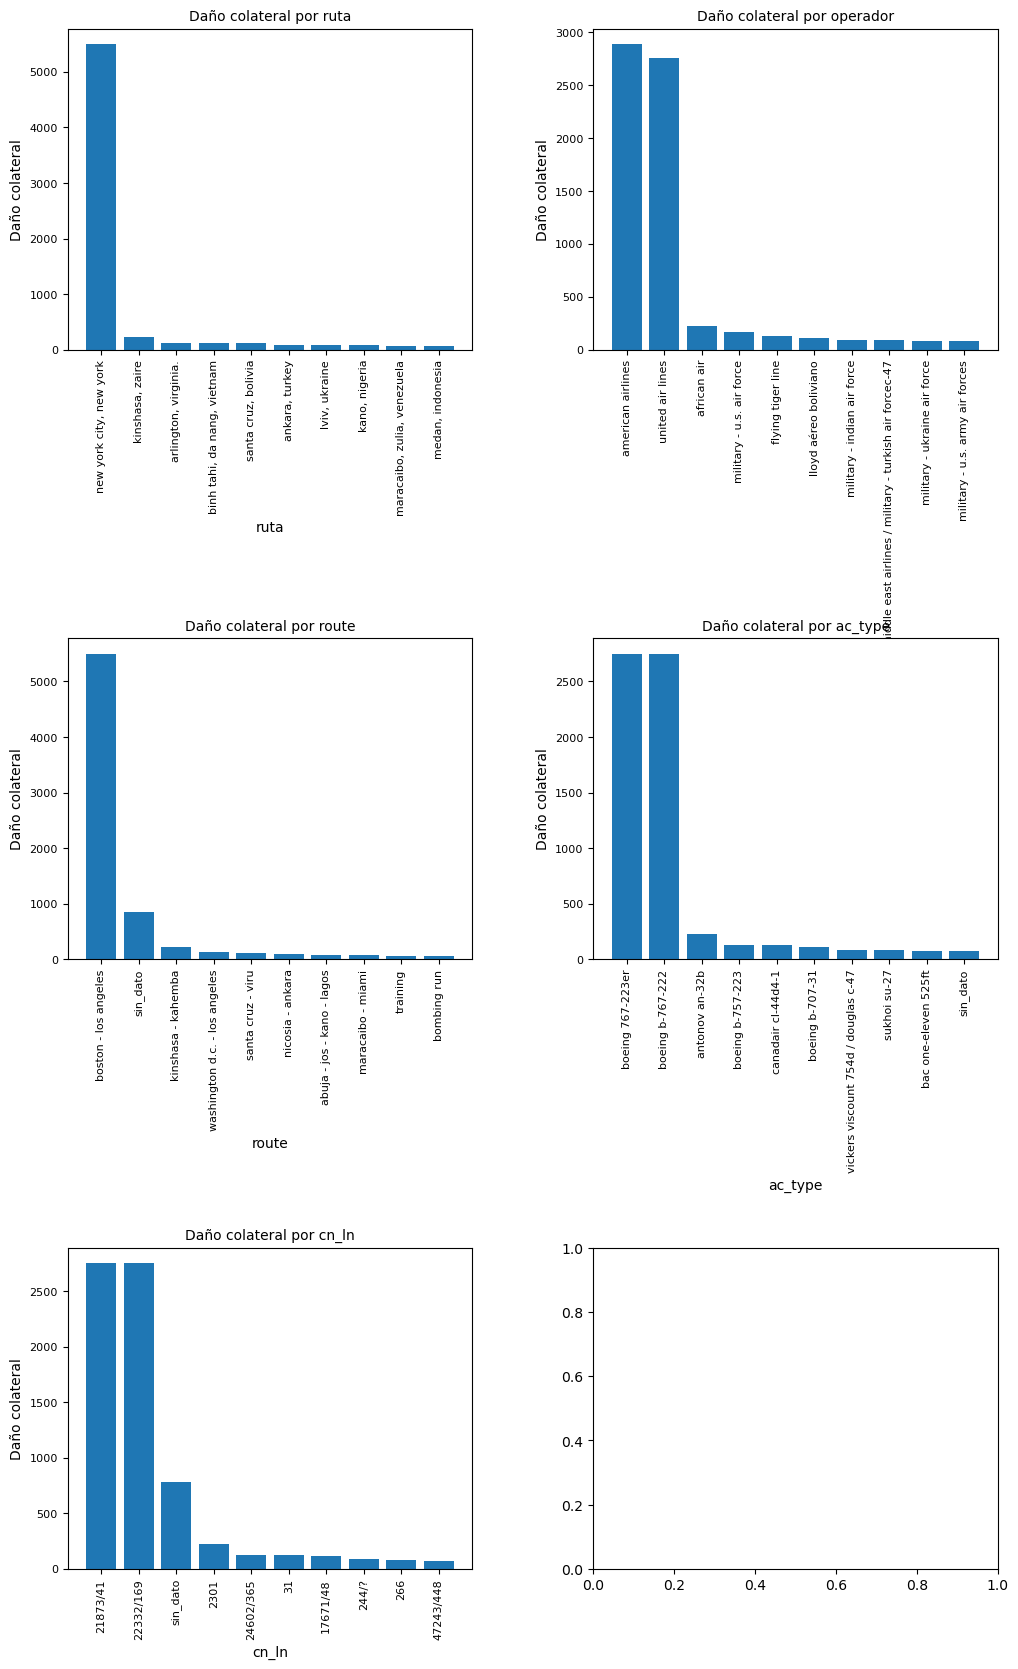

In [42]:
# Seleccionar la columna para generar el histograma
columna_histograma = 'ground'
# Definir las dimensiones de la cuadrícula de subplots
num_columnas = 2
num_filas = math.ceil(len(columnas_histograma)/num_columnas)
# Crear la cuadrícula de subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(12, 20))
# Obtener un arreglo plano de subplots
axs = axs.flatten()
# Iterar sobre las columnas seleccionadas y generar los histogramas en los subplots correspondientes
for i, columna in enumerate(columnas_histograma):
    muertos_frecuentes = df_7.groupby(columna)[columna_histograma].sum()
    muertos_frecuentes=muertos_frecuentes.sort_values(ascending=False).nlargest(10)
    df_filtrado = df_7[df_7[columna].isin(muertos_frecuentes.index)]
    frecuencia_accidentes = df_filtrado.groupby(columna)[columna_histograma].sum().sort_values(ascending=False)
    # Generar el histograma en el subplot correspondiente
    ax = axs[i]
    ax.bar(frecuencia_accidentes.index, frecuencia_accidentes.values)
    ax.set_title('Daño colateral por {}'.format(columna), fontsize=10)
    ax.set_xlabel(columna)
    ax.set_ylabel('Daño colateral')
    ax.tick_params(axis='x', rotation=90, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
# Ajustar los espacios entre los subplots
plt.subplots_adjust(hspace=0.9, wspace=0.3)
# Mostrar los subplots
plt.show()

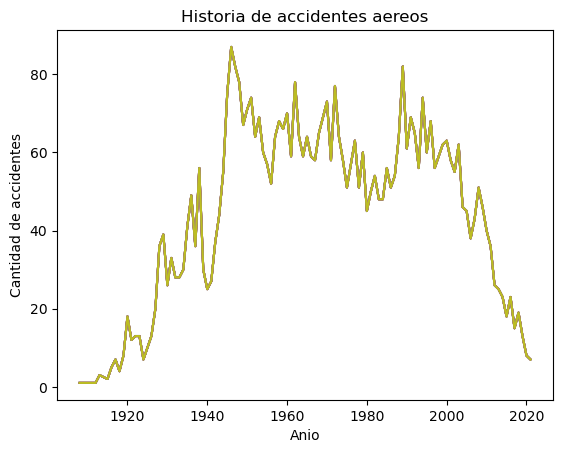

In [43]:
# Crear el gráfico de líneas
plt.plot(df_7['fecha'].dt.year.unique(), df_7.groupby(df_7['fecha'].dt.year).count())
# Establecer etiquetas y título del gráfico
plt.xlabel('Anio')
plt.ylabel('Cantidad de accidentes')
plt.title('Historia de accidentes aereos')
# Mostrar el gráfico
plt.show()

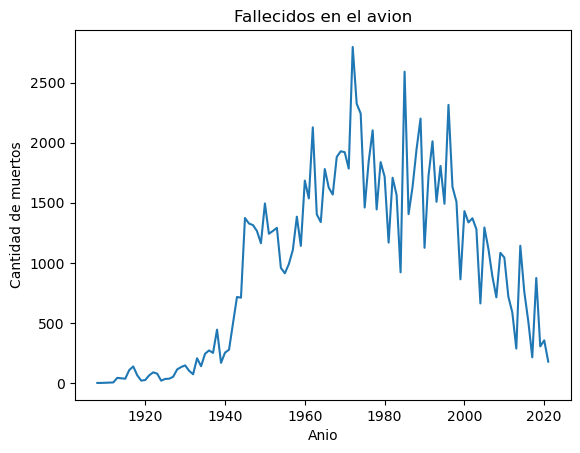

In [44]:
# Crear el gráfico de líneas
plt.plot(df_7['fecha'].dt.year.unique(), df_7.groupby(df_7['fecha'].dt.year)['cantidad_de_fallecidos'].sum())
# Establecer etiquetas y título del gráfico
plt.xlabel('Anio')
plt.ylabel('Cantidad de muertos')
plt.title('Fallecidos en el avion')
# Mostrar el gráfico
plt.show()

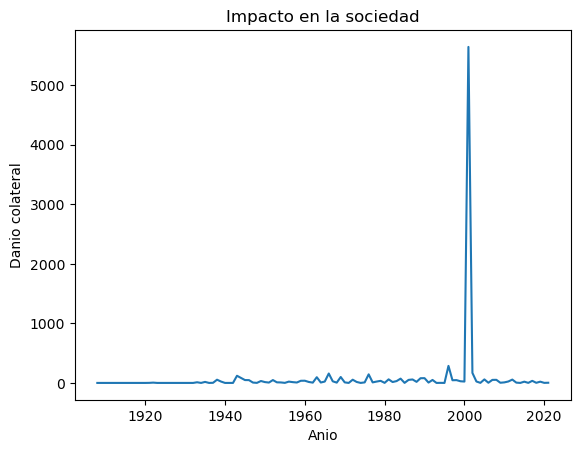

In [45]:
# Crear el gráfico de líneas
plt.plot(df_7['fecha'].dt.year.unique(), df_7.groupby(df_7['fecha'].dt.year)['ground'].sum())
# Establecer etiquetas y título del gráfico
plt.xlabel('Anio')
plt.ylabel('Danio colateral')
plt.title('Impacto en la sociedad')
# Mostrar el gráfico
plt.show()

In [46]:
#grafico muestra un valor anormal fuera de la tendencia original pero se decide no eliminarlo ya que se podria tratar de los atentados de las torres gemelas

In [47]:
df_7.to_csv('dataset_flight_accidents.csv', index=False)

In [48]:
# comparo df_5 con df_7 para ver las filas que quedaron eliminadas y observar que no me afectan en los ultimos anios

In [49]:
df_7.columns

Index(['fecha', 'ruta', 'operador', 'route', 'ac_type', 'cn_ln', 'all_aboard',
       'cantidad_de_fallecidos', 'ground'],
      dtype='object')

In [50]:
df_5.columns

Index(['fecha', 'ruta', 'operador', 'route', 'ac_type', 'cn_ln', 'all_aboard',
       'pasajeros_a_bordo', 'cantidad_de_fallecidos', 'passenger_fatalities',
       'ground'],
      dtype='object')

In [51]:
df_check=df_5[['fecha', 'ruta', 'operador', 'route', 'ac_type', 'cn_ln', 'all_aboard',
       'cantidad_de_fallecidos', 'ground']]

In [52]:
df_diff = pd.concat([df_check, df_6]).drop_duplicates(keep=False)

In [53]:
df_diff

,fecha,ruta,operador,route,ac_type,cn_ln,all_aboard,cantidad_de_fallecidos,ground
26,1919-07-21,"chicago, illinois",wingfoot air express goodyear tire,shuttle,fd type dirigible,NaN,NaN,3.0,10.0
103,1925-09-07,"toul, france",cidna,NaN,spad 33,NaN,NaN,NaN,NaN
347,1934-08-10,"ningbo, china",china national aviation corporation,NaN,sikorsky s-38b,NaN,NaN,NaN,NaN
384,1935-08-13,"hangow, china",china national aviation corporation,NaN,sikorsky s-38b,NaN,NaN,NaN,NaN
451,1936-12-26,"nanking, china",china national aviation corporation,NaN,douglas dc-2,NaN,NaN,NaN,NaN
652,1942-10-01,"kunming, china",china national aviation corporation,NaN,douglas c-47,NaN,NaN,NaN,NaN
754,1944-11-09,"seljord, norway",military - u.s. army air corps,NaN,NaN,NaN,NaN,NaN,NaN
854,1946-03-18,"between chungking and shanghai, china",china national aviation corporation,chunking - shanghai,NaN,NaN,NaN,NaN,NaN
1231,1951-01-20,"huilyo, peru",military - tam,NaN,douglas dc-3,NaN,NaN,16.0,NaN
1362,1952-12-22,"damascus, syria",syrian air,NaN,douglas dc-3,NaN,NaN,9.0,NaN


In [54]:
df_diff.to_csv('eliminados_dataset_flight_accidents.csv', index=False)